In [16]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def radians(angle_in_degrees):
    """Convert degrees to radians."""
    return angle_in_degrees * (math.pi / 180)

In [8]:
  def put_angle_in_range(angle):
    """Put angle in range [0, 2pi]."""
    lim = 2 * math.pi
    if angle < 0:
        if abs(angle) > lim:
            angle = -(abs(angle) % lim)
        angle += lim
    if angle > lim:
        angle %= lim
    return angle

In [25]:
def get_phases_for_scan(phase_coverage, n_steps):
    
    def phase_range(center_phase, n_steps, reverse=False):
            min_phase = put_angle_in_range(center_phase - 0.5 * radians(phase_coverage))
            max_phase = put_angle_in_range(center_phase + 0.5 * radians(phase_coverage))
            # Difference between and max phase is always <= 180 degrees.
            abs_diff = abs(max_phase - min_phase)
            if abs_diff > math.pi:
                abs_diff = 2*math.pi - abs_diff
            # Return list of phases.
            step = abs_diff / (n_steps - 1)
            phases = [min_phase]
            for _ in range(n_steps - 1):
                phase = put_angle_in_range(phases[-1] + step)
                phases.append(phase)
            if reverse:
                phases = phases[::-1]
            return phases
        
    mu_x0 = 1.5
    mu_y0 = 2.5
    n_steps = n_steps // 2
    phases_x = phase_range(mu_x0, n_steps) + n_steps * [mu_x0]
    phases_y = n_steps * [mu_y0] + phase_range(mu_y0, n_steps)
    phases = [(mu_x, mu_y) for mu_x, mu_y in zip(phases_x, phases_y)]
    return phases

In [28]:
phase_coverage = 30.0
n_steps = 24
phases = get_phases_for_scan(phase_coverage, n_steps)
phases = np.array(phases)

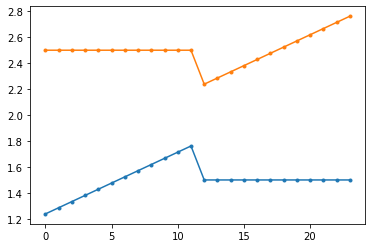

In [29]:
plt.plot(phases[:, 0], marker='.')
plt.plot(phases[:, 1], marker='.')